## Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Importing the Data

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Data Exploration

In [4]:
df.shape

(13320, 9)

In [5]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [9]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [10]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [11]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [12]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False)!= 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100 , 2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100 , 2)!= 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False)!= 0]
    return pd.concat([total , percent , data_type],axis = 1 , keys = ['Total' , 'Percent' , 'Type'])

In [13]:
missing_percentage(df)

,Total,Percent,Type
society,5502,41.31,object
balcony,609,4.57,float64
bath,73,0.55,float64
size,16,0.12,object
location,1,0.01,object


## Data Preprocessing

In [14]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [15]:
#Dealing with Null Values

In [16]:
df.drop(['society'] , axis=1 , inplace = True)

In [17]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [18]:
df.balcony.mode()

0    2.0
Name: balcony, dtype: float64

In [19]:
df.bath.mode()

0    2.0
Name: bath, dtype: float64

In [20]:
df['size'].mode()

0    2 BHK
Name: size, dtype: object

In [21]:
df['location'].mode()

0    Whitefield
Name: location, dtype: object

In [22]:
df['balcony'].fillna(2, inplace=True)
df['bath'].fillna(2, inplace=True)
df['size'].fillna('2 BHK', inplace=True)
df['location'].fillna('Whitefield', inplace=True)

In [23]:
missing_percentage(df)

,Total,Percent,Type


In [24]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [25]:
df[['size_value','size_unit']]=df['size'].str.split(' ',expand=True)

In [26]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,size_value,size_unit
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,BHK
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5,Bedroom
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00,4,BHK
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2,BHK
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4,BHK


In [27]:
df.drop('size',axis=1 , inplace=True)

In [28]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,size_value,size_unit
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3,BHK
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2,BHK
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453,4.0,0.0,231.00,5,Bedroom
13316,Super built-up Area,Ready To Move,Richards Town,3600,5.0,2.0,400.00,4,BHK
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2,BHK
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689,4.0,1.0,488.00,4,BHK


In [29]:
#Dealing with the data Types

In [30]:
df.dtypes

area_type        object
availability     object
location         object
total_sqft       object
bath            float64
balcony         float64
price           float64
size_value       object
size_unit        object
dtype: object

In [31]:
df['size_value']=df['size_value'].astype('float')

In [32]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
df[~df['total_sqft'].apply(is_float)]

,area_type,availability,location,total_sqft,bath,balcony,price,size_value,size_unit
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4.0,BHK
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,2.0,192.000,4.0,Bedroom
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,2.0,224.500,4.0,Bedroom
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4.0,BHK
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2.0,BHK
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3.0,BHK
13059,Super built-up Area,Ready To Move,Harlur,1200 - 1470,2.0,0.0,72.760,2.0,BHK
13240,Super built-up Area,Ready To Move,Devanahalli,1020 - 1130,2.0,2.0,52.570,1.0,BHK
13265,Super built-up Area,20-Sep,Hoodi,1133 - 1384,2.0,0.0,59.135,2.0,BHK


In [34]:
def sqft_mean(x):
    T=x.split('-')
    if len(T) == 2:
        return(float(T[0])+float(T[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
df['total_sqft']=df['total_sqft'].apply(sqft_mean)

In [36]:
df['total_sqft'].mean()

1559.626693912912

In [37]:
df['total_sqft'].fillna(df['total_sqft'].mean(),inplace=True)

In [38]:
df.dtypes

area_type        object
availability     object
location         object
total_sqft      float64
bath            float64
balcony         float64
price           float64
size_value      float64
size_unit        object
dtype: object

## Data Analysis

In [39]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,size_value,size_unit
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,BHK
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0,BHK
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5.0,Bedroom
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,2.0,400.00,4.0,BHK
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,BHK
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,BHK


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_unit', ylabel='count'>

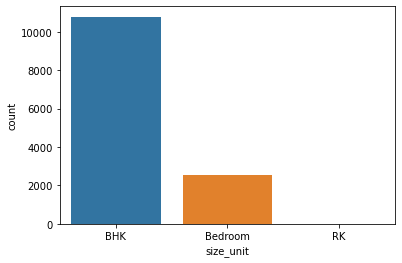

In [40]:
sns.countplot('size_unit',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_unit', ylabel='price'>

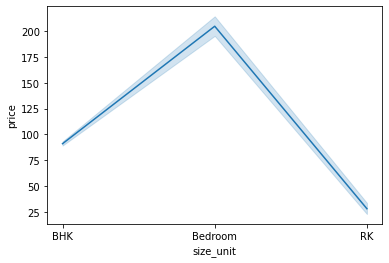

In [41]:
sns.lineplot('size_unit','price',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_value', ylabel='price'>

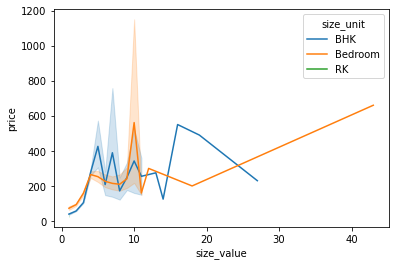

In [42]:
sns.lineplot('size_value','price',data=df, hue='size_unit')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

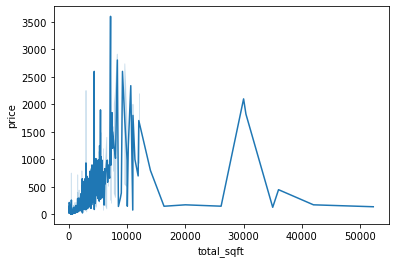

In [43]:
sns.lineplot('total_sqft','price',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balcony', ylabel='price'>

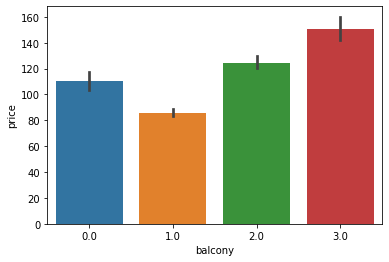

In [44]:
sns.barplot('balcony','price',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bath', ylabel='price'>

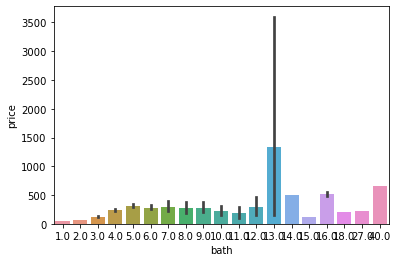

In [45]:
sns.barplot('bath','price',data=df)

## Modeling "Neural Network"

## Importing the Packages

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Split the Data (Input , Output)

In [47]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,size_value,size_unit
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,BHK
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0,BHK
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5.0,Bedroom
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,2.0,400.00,4.0,BHK
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,BHK
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,BHK


In [48]:
x = df.drop(['price'],axis = 1)

In [49]:
y = df.drop(['area_type','availability','location','total_sqft','bath','balcony','size_value','size_unit'],axis=1)

In [50]:
x

,area_type,availability,location,total_sqft,bath,balcony,size_value,size_unit
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,2.0,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,4.0,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,3.0,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,3.0,BHK
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,2.0,BHK
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,5.0,Bedroom
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,2.0,4.0,BHK
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,2.0,BHK
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,4.0,BHK


In [51]:
y

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00
...,...
13315,231.00
13316,400.00
13317,60.00
13318,488.00


## Data Encoding

In [52]:
x_obj = x.select_dtypes(include = ["object"])

In [53]:
x_non_obj = x.select_dtypes(exclude = ["object"])

In [54]:
x_obj

,area_type,availability,location,size_unit
0,Super built-up Area,19-Dec,Electronic City Phase II,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,BHK
4,Super built-up Area,Ready To Move,Kothanur,BHK
...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,Bedroom
13316,Super built-up Area,Ready To Move,Richards Town,BHK
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,BHK
13318,Super built-up Area,18-Jun,Padmanabhanagar,BHK


In [55]:
x_non_obj

,total_sqft,bath,balcony,size_value
0,1056.0,2.0,1.0,2.0
1,2600.0,5.0,3.0,4.0
2,1440.0,2.0,3.0,3.0
3,1521.0,3.0,1.0,3.0
4,1200.0,2.0,1.0,2.0
...,...,...,...,...
13315,3453.0,4.0,0.0,5.0
13316,3600.0,5.0,2.0,4.0
13317,1141.0,2.0,1.0,2.0
13318,4689.0,4.0,1.0,4.0


In [56]:
la = LabelEncoder()

In [57]:
for i in range(x_obj.shape[1]):
    x_obj.iloc[:,i] = la.fit_transform(x_obj.iloc[:,i])

In [58]:
x_obj

,area_type,availability,location,size_unit
0,3,40,419,0
1,2,80,317,1
2,0,80,1179,0
3,3,80,757,0
4,3,80,716,0
...,...,...,...,...
13315,0,80,1252,1
13316,3,80,1004,0
13317,0,80,972,0
13318,3,32,907,0


In [59]:
X = pd.concat([x_non_obj , x_obj], axis=1)

In [60]:
X

,total_sqft,bath,balcony,size_value,area_type,availability,location,size_unit
0,1056.0,2.0,1.0,2.0,3,40,419,0
1,2600.0,5.0,3.0,4.0,2,80,317,1
2,1440.0,2.0,3.0,3.0,0,80,1179,0
3,1521.0,3.0,1.0,3.0,3,80,757,0
4,1200.0,2.0,1.0,2.0,3,80,716,0
...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,0.0,5.0,0,80,1252,1
13316,3600.0,5.0,2.0,4.0,3,80,1004,0
13317,1141.0,2.0,1.0,2.0,0,80,972,0
13318,4689.0,4.0,1.0,4.0,3,32,907,0


## Data Normalization

In [61]:
X

,total_sqft,bath,balcony,size_value,area_type,availability,location,size_unit
0,1056.0,2.0,1.0,2.0,3,40,419,0
1,2600.0,5.0,3.0,4.0,2,80,317,1
2,1440.0,2.0,3.0,3.0,0,80,1179,0
3,1521.0,3.0,1.0,3.0,3,80,757,0
4,1200.0,2.0,1.0,2.0,3,80,716,0
...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,0.0,5.0,0,80,1252,1
13316,3600.0,5.0,2.0,4.0,3,80,1004,0
13317,1141.0,2.0,1.0,2.0,0,80,972,0
13318,4689.0,4.0,1.0,4.0,3,32,907,0


In [62]:
scaler = StandardScaler().fit(X)

In [63]:
X_scaled = scaler.transform(X)

In [64]:
X_scaled

array([[-0.40739296, -0.51453799, -0.75137056, ..., -1.67893016,
        -0.69493672, -0.48366783],
       [ 0.84157723,  1.72643617,  1.73917463, ...,  0.48177474,
        -0.97438533,  2.04179493],
       [-0.09676825, -0.51453799,  1.73917463, ...,  0.48177474,
         1.38722939, -0.48366783],
       ...,
       [-0.33863489, -0.51453799, -0.75137056, ...,  0.48177474,
         0.8201131 , -0.48366783],
       [ 2.53140802,  0.97944479, -0.75137056, ..., -2.11107115,
         0.6420331 , -0.48366783],
       [-0.81670573, -1.26152937, -0.75137056, ...,  0.48177474,
        -0.75794964, -0.48366783]])

## Fitting the Model

In [65]:
model = MLPRegressor(hidden_layer_sizes=(200,200,200,300,200),max_iter=500)

In [66]:
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(200, 200, 200, 300, 200), max_iter=500)

In [67]:
model.score(X,y)

0.506044206043992

In [68]:
model.fit(X_scaled,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(200, 200, 200, 300, 200), max_iter=500)

In [69]:
model.score(X_scaled,y)

0.9186172515561911